In [ ]:
import numpy as np
import pandas as pd
import folium
import geopandas
import matplotlib.pyplot as plt

In [2]:
import os

if os.path.exists("SF_airbnb.csv") is True: #check whether the .csv file exist or not. Preparing for next steps.
    print("File exists.")
else:
    print("Please check the path of data.")

File exists.


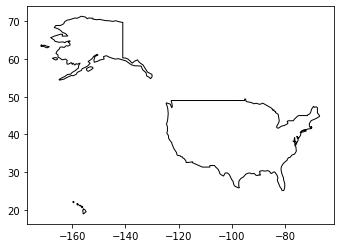

In [14]:
'''
First dataset (with no geo spatial data)
'''

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

US_map = world[world.name == 'United States of America'].plot(color='white', edgecolor='black') # the US Map
#tracks_gdf.plot(ax=ax, color='red')
plt.show()

In [13]:
criminal_csv = pd.read_csv("..\data\Police_Department_Incidents_-_Previous_Year__2016_.csv") # read the data

criminal_csv.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200000e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200000e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410000e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600000e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,0:30,MISSION,NONE,16TH ST / MISSION ST,1.600000e+13


In [15]:
df_criminal = pd.DataFrame(criminal_csv) # transfer to dataframe
df_criminal

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200000e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,1.200000e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,1.410000e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,1.600000e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,0:30,MISSION,NONE,16TH ST / MISSION ST,1.600000e+13
...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,1.610000e+13
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,8:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,1.760000e+13
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,1.760000e+13
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,1.760000e+13


In [16]:
df_criminal['Category']
df_criminal['Category'].value_counts(sort) # Classify the categories of crimes

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

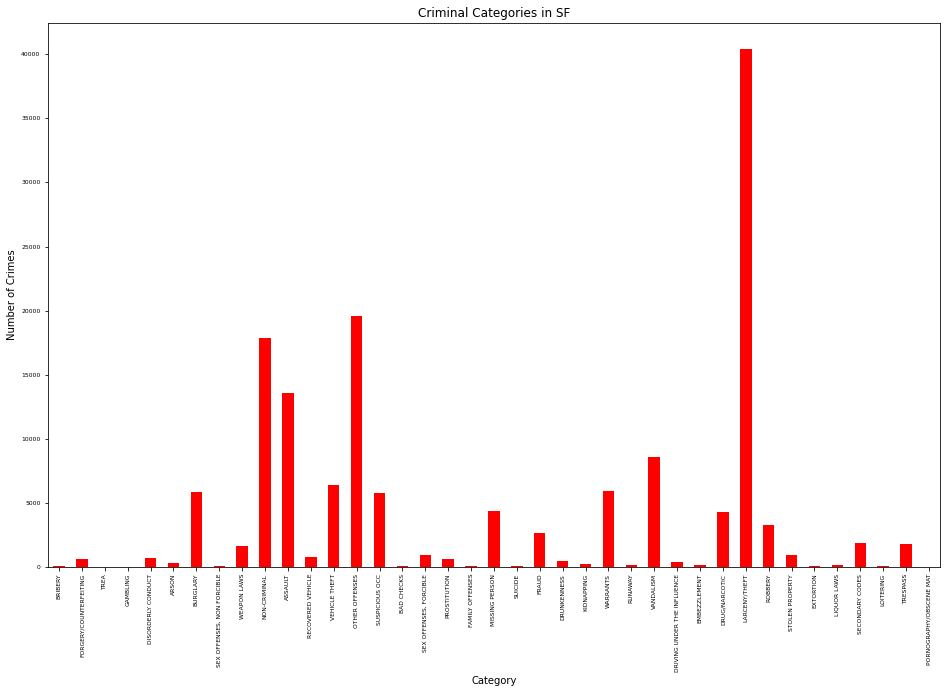

In [17]:
df_criminal['Category'].value_counts(sort=False).plot(kind = "bar", title = "Criminal Categories in SF", fontsize = 6, figsize = (16,10), colormap = "hsv") # generate the categories as figure, I use bar graph here and edit the fontsize for viewing easier
plt.xlabel("Category") # x label
plt.ylabel("Number of Crimes") # y label
plt.show()

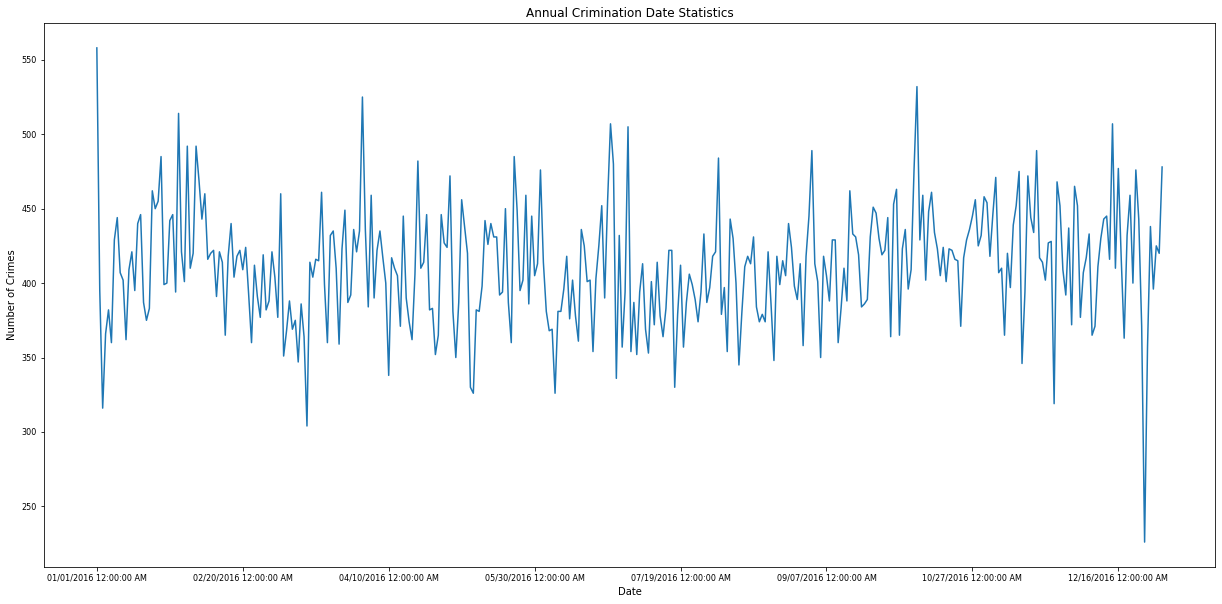

In [18]:
df_criminal["Date"].sort_values().value_counts(sort=True).sort_index().plot(kind="line", title = "Annual Crimination Date Statistics", fontsize = 8, figsize = (21,10)) # generate the number of crimes for each day in 2016 in SF
plt.xlabel("Date") # x label
plt.ylabel("Number of Crimes") # y label
plt.show()

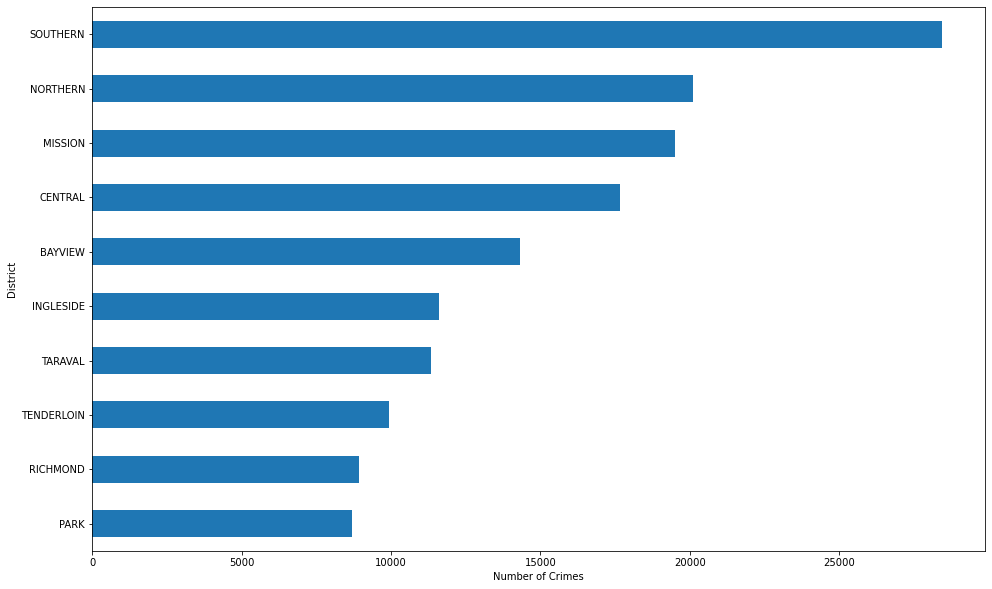

In [19]:
df_criminal['PdDistrict'].value_counts(ascending = True).plot(kind = "barh", stacked=True, figsize = (16,10)) # classify the district 
plt.xlabel("Number of Crimes") # x label
plt.ylabel("District") # y label
plt.show()

In [20]:
'''
Second dataset (with geo spatial data)
'''

# read the airbnb csv file
SFairbnb_data = pd.read_csv("../data/SF_airbnb.csv")
SFairbnb_data.head()
SFairbnb_data.sort_values("price", ascending=False).head(10) # select the most expensive 10 airbnbs

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4954,37485981,"Harbor Court San Francisco, Bay View 1 Bdrm Suite",282950277,Harbor Court Hotel,NaN,Financial District,37.79310,-122.39249,Private room,25000,1,0,NaN,NaN,1,0
6129,43653875,Great Space in SF,104309976,WanderJaunt,NaN,Financial District,37.78613,-122.40184,Entire home/apt,10000,30,0,NaN,NaN,1,0
4981,37674309,"Full Room with 1 Bed, Hotel Fusion",283797982,Hotel Fusion,NaN,Downtown/Civic Center,37.78659,-122.40928,Private room,10000,1,0,NaN,NaN,2,0
4980,37674141,"Queen Room with 1 Bed, Hotel Fusion",283797982,Hotel Fusion,NaN,Downtown/Civic Center,37.78608,-122.40969,Private room,10000,1,0,NaN,NaN,2,0
425,1059961,KelSoMa 1 Bed & Bath in SoMa,265601,David,NaN,South of Market,37.77981,-122.41022,Shared room,10000,35,40,2015-11-27,0.43,1,90
4742,35837171,"Executive Hotel Vintage Court, King Room",268186698,Executive Hotel Vintage Court,NaN,Chinatown,37.79146,-122.40698,Private room,9999,1,0,NaN,NaN,1,0
5869,42436568,Ritz Carlton luxury residence - 3 bedroom,262211596,Kevin,NaN,Financial District,37.78744,-122.40355,Entire home/apt,9999,3,0,NaN,NaN,79,0
5306,39522818,"The Marker San Francisco, Deluxe Queen Room",303141126,The Marker San Francisco,NaN,Downtown/Civic Center,37.78584,-122.41221,Private room,9999,1,0,NaN,NaN,6,43
5307,39523262,"The Marker San Francisco, Deluxe King Room",303141126,The Marker San Francisco,NaN,Downtown/Civic Center,37.78785,-122.41166,Private room,9999,1,0,NaN,NaN,6,4
5308,39523440,"The Marker San Francisco, Deluxe Two Double Room",303141126,The Marker San Francisco,NaN,Downtown/Civic Center,37.78715,-122.41122,Private room,9999,1,0,NaN,NaN,6,5


In [23]:
# top 300 price map
SF_location2 = folium.Map(location = [37.747906, -122.447602], # SF location
                         zoom_start = 12, # default zoom level
                         tiles = 'Stamen Toner')

top_price_data = SFairbnb_data.sort_values("price", ascending=False) # list all datas from the highest price to the lowest

top_300_price_data = top_price_data.iloc[0:300] # I select top 300 as our sample.

top_300_loc = folium.map.FeatureGroup()

for lat,lon in zip(top_300_price_data.latitude, top_300_price_data.longitude): # read the latitude and longitude into map
    top_300_loc.add_child(
        folium.CircleMarker(
            [lat, lon],
            radius = 3,
            color = 'red'
        )
    )
SF_location2.add_child(top_300_loc) # add into map

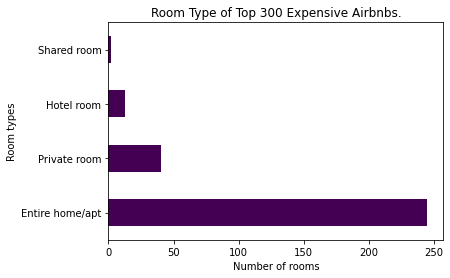

In [25]:
top_300_price_data['room_type'].value_counts().plot(kind = 'barh', title = "Room Type of Top 300 Expensive Airbnbs.", colormap = "viridis") # list and generate room types of the top 300 price airbnbs
plt.xlabel("Number of rooms") # x label
plt.ylabel("Room types") # y label
plt.show()

In [26]:
SFairbnb_data.sort_values("price", ascending=True).head(10) # cheapest 10 airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1638,10105531,Studio by Dolores Park & Castro,9776019,Lorenzo,NaN,Castro/Upper Market,37.76191,-122.42785,Entire home/apt,10,30,19,2018-08-10,0.39,2,180
2490,18718406,Dolores Park Studio,58350764,Wei,NaN,Castro/Upper Market,37.76081,-122.42995,Entire home/apt,10,30,2,2019-12-31,0.05,1,180
1576,9414887,Dolores Park Victorian,9776019,Lorenzo,NaN,Castro/Upper Market,37.76101,-122.42796,Entire home/apt,10,30,0,NaN,NaN,2,180
6003,43188259,Fulton Startup House - Private Cubicle,269221260,Startup House,NaN,Inner Richmond,37.77519,-122.45707,Shared room,20,30,0,NaN,NaN,39,364
6005,43188289,Fulton Startup House - Private Cubicle,269221260,Startup House,NaN,Inner Richmond,37.77524,-122.45724,Shared room,20,30,1,2021-01-20,0.71,39,0
6002,43188257,Fulton Startup House - Private Cubicle,269221260,Startup House,NaN,Inner Richmond,37.77564,-122.45730,Shared room,20,30,1,2020-12-01,0.33,39,334
2092,15194176,Community in North Beach,12176788,Jean-Loïck,NaN,North Beach,37.80153,-122.40904,Shared room,20,31,16,2020-03-17,0.30,23,253
6001,43188255,Fulton Startup House: Semi - Private Room,269221260,Startup House,NaN,Inner Richmond,37.77580,-122.45728,Shared room,20,30,0,NaN,NaN,39,364
6000,43188250,Fulton Startup House: Semi - Private Room,269221260,Startup House,NaN,Inner Richmond,37.77568,-122.45728,Shared room,20,30,0,NaN,NaN,39,364
5239,39209512,3-people furnished room/twin beds/ at Japantown,1682188,Nika & Sergii,NaN,Western Addition,37.78666,-122.42940,Shared room,20,30,2,2020-12-01,0.39,15,182


In [27]:
# last 300 price map
SF_location3 = folium.Map(location = [37.747906, -122.447602], # SF location
                         zoom_start = 12, # default zoom level
                         tiles = 'Stamen Toner')

bottom_price_data = SFairbnb_data.sort_values("price", ascending=True) # list all datas from the lowest price to the highest

bottom_300_price_data = bottom_price_data.iloc[0:300] # Same as above, I select top 300 as our sample.

bottom_300_loc = folium.map.FeatureGroup()

for lat,lon in zip(bottom_300_price_data.latitude, bottom_300_price_data.longitude): # read the latitude and longitude into map
    bottom_300_loc.add_child(
        folium.CircleMarker(
            [lat, lon],
            radius = 3,
            color = 'green'
        )
    )
SF_location3.add_child(bottom_300_loc) # add into map

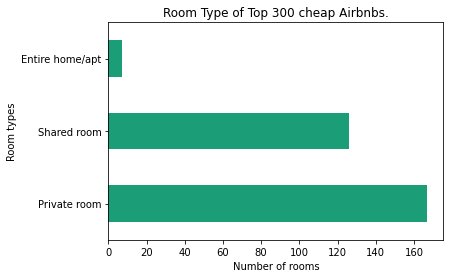

In [28]:
bottom_300_price_data['room_type'].value_counts().plot(kind = 'barh', title = "Room Type of Top 300 cheap Airbnbs.", colormap = "Dark2") # list and generate room types of the bottom 300 price airbnbs
plt.xlabel("Number of rooms") # x label
plt.ylabel("Room types") # y label
plt.show()